In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 - $\small\text{Understanding round-off error:}$

$\scriptsize\textit{Note, no program is required for this question.}$ 

Consider a quadratic equation of the form $ax^2 + bx + c = 0$. The two solutions of this are:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

$\textbf{(a)}$ Explain how this expression may be problematic with respect to roundoff errors if $b$ is much larger than $a$ and $c$. Recall that such errors often occur when subtracting close large numbers.

$\textbf{Solution to (a)}$ 

When b is much larger than a and c, the term √(b² - 4ac) becomes approximately √b² = |b|.

Looking at the numerator -b ± √(b² - 4ac):
- If b > 0: we get -b + √(b² - 4ac) ≈ -b + b = 0
- If b < 0: we get -b - √(b² - 4ac) ≈ -b - (-b) = 0

In both cases, we're subtracting two nearly equal large numbers. In floating-point arithmetic, the significant digits cancel out and only roundoff errors remain, causing large errors in the computed root. This is catastrophic cancellation.

For example, if b = 10000, a = 1, c = 1, we'd compute something like -10000 + 9999.9998, where small errors in the large numbers dominate the result.

$\textbf{(b)}$ Provide an alternative expression that will have smaller errors in the situation you describe in (a). Hint: The same trick should work as for the “Round-off error example” in Lecture 1.

$\textbf{Solution to (b)}$

The trick is to multiply by the conjugate to avoid the problematic subtraction, just like in the lecture example with √(x+1) - √x.

For the root that causes problems, multiply numerator and denominator by the conjugate:

If b > 0, the problematic root is:
$$x = \frac{-b + \sqrt{b^2 - 4ac}}{2a}$$

Multiply by $\frac{-b - \sqrt{b^2 - 4ac}}{-b - \sqrt{b^2 - 4ac}}$:

$$x = \frac{(-b + \sqrt{b^2 - 4ac})(-b - \sqrt{b^2 - 4ac})}{2a(-b - \sqrt{b^2 - 4ac})} = \frac{b^2 - (b^2 - 4ac)}{2a(-b - \sqrt{b^2 - 4ac})} = \frac{2c}{-b - \sqrt{b^2 - 4ac}}$$

Similarly, if b < 0, the alternative form is:
$$x = \frac{2c}{-b + \sqrt{b^2 - 4ac}}$$

This avoids catastrophic cancellation by replacing the subtraction with a division.

# Problem 2 - $\small\text{Round-off error and accurate calculation of the exponential series:}$

Consider the series expansion for an exponential function:

$$e^x \simeq S_n(x) = 1 + \frac{x}{1!} +  \frac{x^2}{2!} + ... + \frac{x^n}{n!}$$

In [2]:
def exp_series(x, n):
    
    is_negative = x < 0
    x = abs(x)
    
    result = 1.0  # First term (x^0/0! = 1, and as given)
    term = 1.0
    
    for i in range(1, n + 1):
        term *= x / i 
        result += term
    
    return 1.0 / result if is_negative else result

$\textbf{(a)}$ Write a program that computes the exponential function using this series expansion for given number of terms $n$.

In [3]:
x_test = 20.0
n_test = 10
series_result = exp_series(x_test, n_test)
numpy_result = np.exp(x_test)

print(f"e^{x_test} with {n_test} terms:")
print(f"Series result: {series_result:.10f}")
print(f"NumPy result:  {numpy_result:.10f}")
print(f"Relative error: {abs(series_result - numpy_result)/numpy_result:.2e}")

e^20.0 with 10 terms:
Series result: 5245469.6772486782
NumPy result:  485165195.4097902775
Relative error: 9.89e-01


$\textbf{(b)}$ For $n$ ranging between $0$ and $100$, compare the result with the exponent calculated with a built-in function or function form a numerical library (e.g., numpy.exp) in the following way. Plot the error defined by

$$\epsilon_n = \frac{|e^x - S_n(x)|}{e^x}$$

on a log-log plot for a large positive and large negative exponent (e.g., $x = 20$ and $x =−20$). Describe what you see.

In [4]:
def analyze_convergence(x_val, max_n=100):
    n_values = range(1, max_n + 1)
    errors = []
    true_value = np.exp(x_val)
    
    for n in n_values:
        series_approx = exp_series(x_val, n)
        errors.append(abs(series_approx - true_value) / abs(true_value))
    
    return n_values, errors

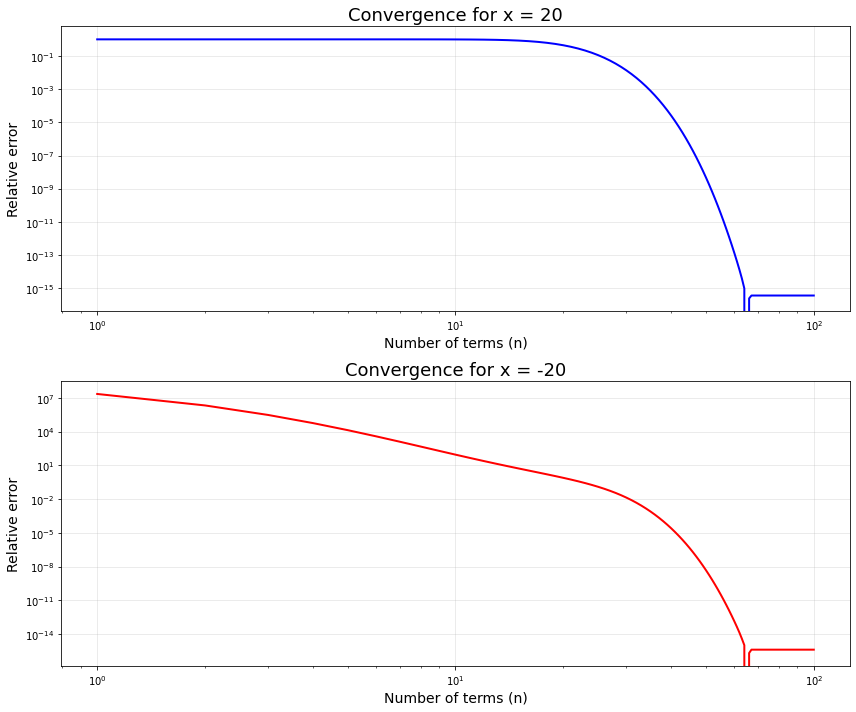

In [5]:
n_vals, errors_pos = analyze_convergence(20)
_, errors_neg = analyze_convergence(-20)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].loglog(n_vals, errors_pos, 'b-', linewidth=2)
axes[0].set_xlabel('Number of terms (n)', fontsize=14)
axes[0].set_ylabel('Relative error', fontsize=14)
axes[0].set_title('Convergence for x = 20', fontsize=18)
axes[0].grid(True, alpha=0.3)

axes[1].loglog(n_vals, errors_neg, 'r-', linewidth=2)
axes[1].set_xlabel('Number of terms (n)', fontsize=14)
axes[1].set_ylabel('Relative error', fontsize=14)
axes[1].set_title('Convergence for x = -20', fontsize=18)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

For $x = 20$, the series converges relatively smoothly, with error dropping sharply around $n \approx 50-60$ terms to reach machine precision ($\sim 10^{-15}$).

For $x = -20$, the initial error is much larger ($\sim 10^7$ compared to $\sim 0.1$ for positive $x$). This happens because we compute $e^{|x|}$ and then take the reciprocal. When the series has too few terms, $e^{20}$ is severely underestimated, and taking the reciprocal of this poor approximation amplifies the error dramatically. The error decreases more gradually and needs around $n \approx 60-70$ terms before converging to machine precision.

Both methods eventually converge, but the reciprocal approach for negative x performs poorly until enough terms accumulate to accurately compute $e^{20}$.

$\textbf{(c)}$ Consider the following (trivial) equality: $e^{−x} = (e^{−1})^x$. Write a program that utilizes this equality to get a more accurate series expansion for large negative exponents. Plot $\epsilon_n$ on a log-log plot to demonstrate that you have achieved this.

In [6]:
def exp_series_improved(x, n):
    if x >= 0:
        return exp_series(x, n)
    else:
        e_neg1 = exp_series(1, n)
        return (1/e_neg1) ** abs(x)
    
def analyze_convergence_improved(x_val, max_n=100):
    n_values = range(1, max_n + 1)
    errors = []
    
    true_value = np.exp(x_val)
    
    for n in n_values:
        series_approx = exp_series_improved(x_val, n)
        relative_error = abs(series_approx - true_value) / abs(true_value)
        errors.append(relative_error)
    
    return n_values, errors

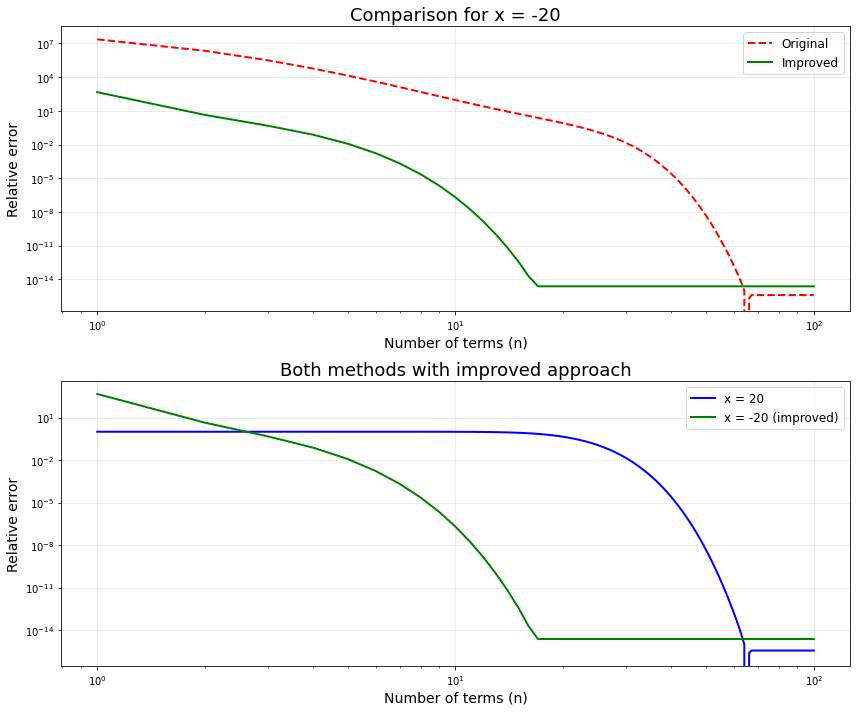

In [7]:
# Compare for x = -20
n_vals, errors_neg_improved = analyze_convergence_improved(-20)

# Plot comparison
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Original vs improved for x = -20
axes[0].loglog(n_vals, errors_neg, 'r--', linewidth=2, label='Original')
axes[0].loglog(n_vals, errors_neg_improved, 'g-', linewidth=2, label='Improved')
axes[0].set_xlabel('Number of terms (n)', fontsize=14)
axes[0].set_ylabel('Relative error', fontsize=14)
axes[0].set_title('Comparison for x = -20', fontsize=18)
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Both x = 20 and x = -20 with improved method
axes[1].loglog(n_vals, errors_pos, 'b-', linewidth=2, label='x = 20')
axes[1].loglog(n_vals, errors_neg_improved, 'g-', linewidth=2, label='x = -20 (improved)')
axes[1].set_xlabel('Number of terms (n)', fontsize=14)
axes[1].set_ylabel('Relative error', fontsize=14)
axes[1].set_title('Both methods with improved approach', fontsize=18)
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The improved method using $e^{(-x)} = (e^{(-1)})^x$ dramatically reduces the convergence time for negative exponents. The top plot shows that for $x = -20$, the improved approach (green) reaches machine precision around $n \approx 20$ terms, compared to $n \approx 60$ for the original method (red dashed). The bottom plot demonstrates that negative and positive exponents now converge at similar rates, eliminating the poor performance seen with the reciprocal approach in part (b).

# Problem 3 - $\small\text{Errors in numerical differentiation:}$

Calculate the derivative of the function $f(x) = sin(x)$ at the point $x = π/4$ using the first-order forward difference. Plot on a log-log plot the error with respect to the analytical derivative for a wide range of $\Delta x$. Describe the behavior you see (especially for very small $\Delta x$) and the reason for the trends. How does it change if you use a second-order central difference? How about a fourth-order central difference?

In [8]:
def first_order_forward(f, x, dx):
    return (f(x + dx) - f(x)) / dx

def second_order_central(f, x, dx):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def fourth_order_central(f, x, dx):
    return (-f(x + 2*dx) + 8*f(x + dx) - 8*f(x - dx) + f(x - 2*dx)) / (12 * dx)

# Function and derivative
def f(x):
    return np.sin(x)

x0 = np.pi / 4
analytical = np.cos(x0)

In [9]:
# Range of step sizes
dx_values = np.logspace(-16, 0, 100)

# Compute errors
forward_errors = [abs(first_order_forward(f, x0, dx) - analytical) for dx in dx_values]
central_errors = [abs(second_order_central(f, x0, dx) - analytical) for dx in dx_values]
fourth_errors = [abs(fourth_order_central(f, x0, dx) - analytical) for dx in dx_values]

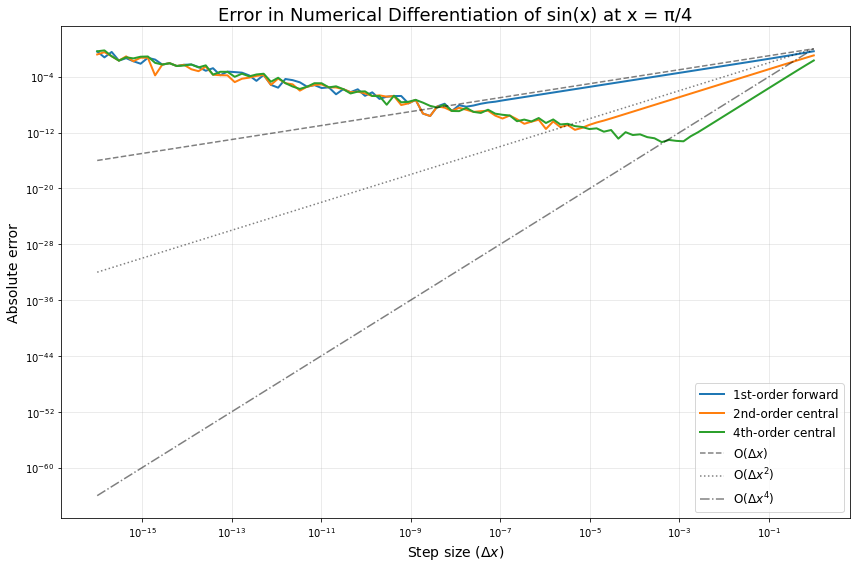

In [10]:
# Plot
plt.figure(figsize=(12, 8))
plt.loglog(dx_values, forward_errors, linewidth=2, label='1st-order forward')
plt.loglog(dx_values, central_errors, linewidth=2, label='2nd-order central')
plt.loglog(dx_values, fourth_errors, linewidth=2, label='4th-order central')

# Reference lines
dx_ref = np.logspace(-16, 0, 100)
plt.loglog(dx_ref, dx_ref, 'k--', alpha=0.5, label='O($\Delta x$)')
plt.loglog(dx_ref, dx_ref**2, 'k:', alpha=0.5, label='O($\Delta x^2$)')
plt.loglog(dx_ref, dx_ref**4, 'k-.', alpha=0.5, label='O($\Delta x^4$)')

plt.xlabel('Step size ($\Delta x$)', fontsize=14)
plt.ylabel('Absolute error', fontsize=14)
plt.title('Error in Numerical Differentiation of sin(x) at x = π/4', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The plot shows three distinct regions of behavior:

For large $\Delta x$ ($> 10^{-4}$), the error decreases as $\Delta x$ gets smaller, following the expected theoretical scaling: O($\Delta x$) for first-order forward, O($\Delta x^2$) for second-order central, and O($\Delta x^4$) for fourth-order central. This is truncation error which comes from approximating the derivative with a finite difference.

Around $\Delta x \approx 10^{-8}$ to $10^{-5}$, each method reaches its minimum error. This is the optimal region where truncation error and round-off error balance.

For very small $\Delta x$ ($< 10^{-10}$), the error increases as $\Delta x$ decreases. This happens because when $\Delta x$ is extremely small, $f(x + \Delta x)$ and $f(x)$ become nearly identical in floating-point arithmetic. Computing their difference causes catastrophic cancellation where most significant digits are lost. Dividing by the tiny $\Delta x$ then amplifies this small error. The round-off error scales as $\frac{\epsilon}{\Delta x}$ (where $\epsilon$ is machine precision), which is why all curves turn upward on the left side of the plot.

This demonstrates that smaller step sizes don't always produce more accurate results in finite precision arithmetic.

# Problem 4 - $\small\text{Comparing methods of integration:}$

Consider the function:

$$I = \int_0^1 sin^2 \left( \sqrt{100x} \right) dx$$

In [11]:
from scipy import integrate

def integrand(x):
    return np.sin(np.sqrt(100 * x))**2

$\textbf{(a)}$ Plot the integrand over the range of the integral.

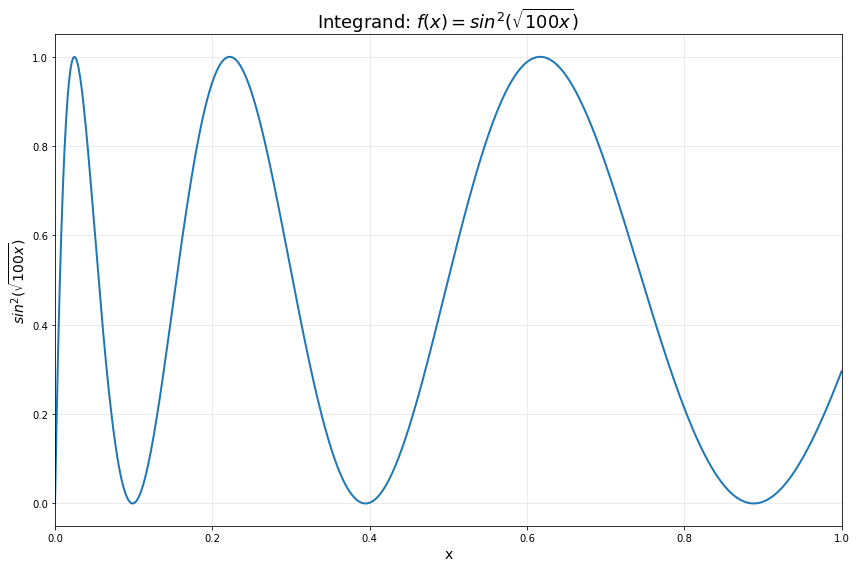

In [12]:
x = np.linspace(0, 1, 1000)
y = integrand(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, linewidth=2)
plt.xlabel('x', fontsize=14)
plt.ylabel('$sin^2(\sqrt{100x})$', fontsize=14)
plt.title('Integrand: $f(x) = sin^2(\sqrt{100x})$', fontsize=18)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

$\textbf{(b)}$ Write a program that uses the $\textit{adaptive trapezoid rule}$ to calculate the integral to an approximate accuracy of $\epsilon = 10^{−6}$, using the following procedure: 

- Start with the trapezoid rule using a single subinterval. Double the number of subintervals and recalculate the integral. 
- Continue to double the number of subintervals until the error is less than $10^{−6}$. 

Recall that the error is given by $\epsilon_i = \cfrac{1}{3} \left(I_i - I_{i-1}\right)$ where the number of subintervals Ni used to calculate $I_i$ is twice that used to calculate $I_{i−1}$. To make your implementation more efficient, use the fact that

$$ I_i = \frac{1}{2} I_{i-1} +h_i \sum_k f(a+ kh_i) $$

where $h_i$ is the width of the subinterval for the $i$th iteration, and $k$ runs over odd numbers from $1$ to $N_{i−1}$.

In [13]:
def adaptive_trapezoidal(f, a, b, tolerance=1e-6):
    n = 1
    h = (b - a) / n
    I_prev = (h/2) * (f(a) + f(b))
    
    iteration = 1
    total_evals = 2
    
    while True:
        n = 2 * n
        h = (b - a) / n
        
        sum_new = sum(f(a + k * h) for k in range(1, n, 2))
        total_evals += n // 2
        
        I_current = 0.5 * I_prev + h * sum_new
        error_estimate = abs(I_current - I_prev) / 3
        
        if error_estimate < tolerance:
            break
            
        I_prev = I_current
        iteration += 1
        
        if iteration > 20:
            print("Warning: Maximum iterations reached!")
            break
    
    return I_current, iteration, total_evals

In [14]:
# Calculate integral
tolerance = 1e-6
result, iterations, func_evals = adaptive_trapezoidal(integrand, 0, 1, tolerance)

exact_value, _ = integrate.quad(integrand, 0, 1, limit=100)

print(f"Integral value: {result:.10f}")
print(f"Reference value: {exact_value:.10f}")
print(f"Difference: {abs(result - exact_value):.2e}")
print(f"Iterations: {iterations}")
print(f"Function evaluations: {func_evals}")

Integral value: 0.4558320583
Reference value: 0.4558325323
Difference: 4.74e-07
Iterations: 12
Function evaluations: 4097


$\textbf{(c)}$ Write a separate program that uses $\textit{Romberg integration}$ to solve the integral, also to an accuracy of $10^{−6}$ using the following procedure. 

- First calculate the integral with the trapezoid rule for 1 subinterval [as you did in part (b)]; we will refer to this as step $i = 1$, and the result as $I_1 \equiv R_{1,1}$.
- Then, calculate $I_2 \equiv R_{2,1}$ using 2 subintervals (make use of the equation from part (b). 

Using these two results, we can construct an improved estimate of the integral as: $R_{2,2} = R_{2,1} + \cfrac{1}{3} (R_{2,1} − R_{1,1})$. In general 

$$R_{i,m+1} = R_{i,m} + \frac{1}{4^m − 1} (R_{i,m} − R_{i−1,m}).$$

Therefore, for each iteration $i$ (where we double the number of subintervals), we can obtain improved approximations up to $m = i−1$ with very minor extra work. For each $i$ and $m$, we can calculate the error at previous steps as

$$\epsilon_{i,m} =\frac{1}{4^m − 1}(R_{i,m} − R_{i−1,m}).$$

Use the previous two equations to iterate until the error in $R_{i,i}$ is less than $10^{−6}$. How significant is the improvement with respect to number of subintervals necessary compared to the approach of part (b)?

In [15]:
def romberg_integration(f, a, b, tolerance=1e-6):
    R = np.zeros((20, 20))
    n = 1
    h = (b - a) / n
    R[0, 0] = (h/2) * (f(a) + f(b))
    total_evals = 2
    
    for i in range(1, 20):
        n = 2**i
        h = (b - a) / n
        
        sum_new = sum(f(a + k * h) for k in range(1, n, 2))
        total_evals += n // 2
        R[i, 0] = 0.5 * R[i-1, 0] + h * sum_new
        
        for m in range(1, i + 1):
            R[i, m] = R[i, m-1] + (R[i, m-1] - R[i-1, m-1]) / (4**m - 1)
        
        error = abs(R[i, i] - R[i-1, i-1]) / (4**i - 1)
        if error < tolerance:
            return R[i, i], i+1, total_evals
    
    return R[i, i], 20, total_evals

In [16]:
tolerance = 1e-6
romberg_result, romberg_iters, romberg_evals = romberg_integration(integrand, 0, 1, tolerance)

print(f"Result: {romberg_result:.10f}")
print(f"Function evaluations: {romberg_evals}")

Result: 0.4558324945
Function evaluations: 65


Romberg integration achieved the same tolerance ($10^{-6}$) with only 65 function evaluations compared to 4097 for adaptive trapezoidal - a 63x improvement. This dramatic efficiency gain comes from Richardson extrapolation, which systematically eliminates higher-order error terms rather than just refining the mesh.

$\textbf{(d)}$ Use the $\textit{Gauss-Legendre approach}$ to calculate the integral. What order (i.e., how many points) do you need to obtain an accuracy below $10^{−6}$? You can find tabulated weights and points online, e.g., https://pomax.github.io/bezierinfo/legendre-gauss.html.

In [17]:
from numpy.polynomial import legendre

In [18]:
def gauss_legendre_quadrature(f, a, b, n):
    nodes, weights = legendre.leggauss(n)
    transformed_nodes = (b - a) / 2 * nodes + (a + b) / 2
    jacobian = (b - a) / 2
    return jacobian * np.sum(weights * f(transformed_nodes))

In [19]:
tolerance = 1e-6
exact_value, _ = integrate.quad(integrand, 0, 1, limit=100)

print(f"Reference value: {exact_value:.10f}")
print(f"Target tolerance: {tolerance:.0e}\n")

Reference value: 0.4558325323
Target tolerance: 1e-06



In [20]:
for n in range(1, 15):
    result = gauss_legendre_quadrature(integrand, 0, 1, n)
    error = abs(result - exact_value)
    print(f"Order {n:2d}: Result = {result:.10f}, Error = {error:.2e}")
    
    if error < tolerance:
        print(f"\n✓ Minimum order needed: {n} points")
        break

Order  1: Result = 0.5024843311, Error = 4.67e-02
Order  2: Result = 0.6273262731, Error = 1.71e-01
Order  3: Result = 0.2360369272, Error = 2.20e-01
Order  4: Result = 0.4267093048, Error = 2.91e-02
Order  5: Result = 0.5631145323, Error = 1.07e-01
Order  6: Result = 0.4702227756, Error = 1.44e-02
Order  7: Result = 0.4564458645, Error = 6.13e-04
Order  8: Result = 0.4558444064, Error = 1.19e-05
Order  9: Result = 0.4558326554, Error = 1.23e-07

✓ Minimum order needed: 9 points


Gauss-Legendre quadrature requires only $\boxed{9 \,\text{points}}$ to achieve a $10^{-6}$ tolerance.


# Problem 5 - $\small\text{Integration to} \;\infty:$

Consider the gamma function,

$$\Gamma (a) = \int_0^\infty x^{a-1}e^{-x} dx$$

We want to evaluate this numerically, $\textbf{and we will focus on} \, a > 1$. Consider a variable transforma-
tion of the form:

$$ z = \frac{x}{x+c}$$ 

This will map $x \in [0, \infty)$ to $z \in [0, 1]$, allowing us to do this integral numerically in terms of $z$.

For convenience, we express the integrand as $\phi(x) = x^{a−1}e^{−x}$.

In [21]:
from scipy.special import gamma

In [22]:
def gamma_integrand(x, a):
    return x**(a-1) * np.exp(-x)

$\textbf{(a)}$ Plot $\phi(x)$ for $a = 2, 3, 4$.

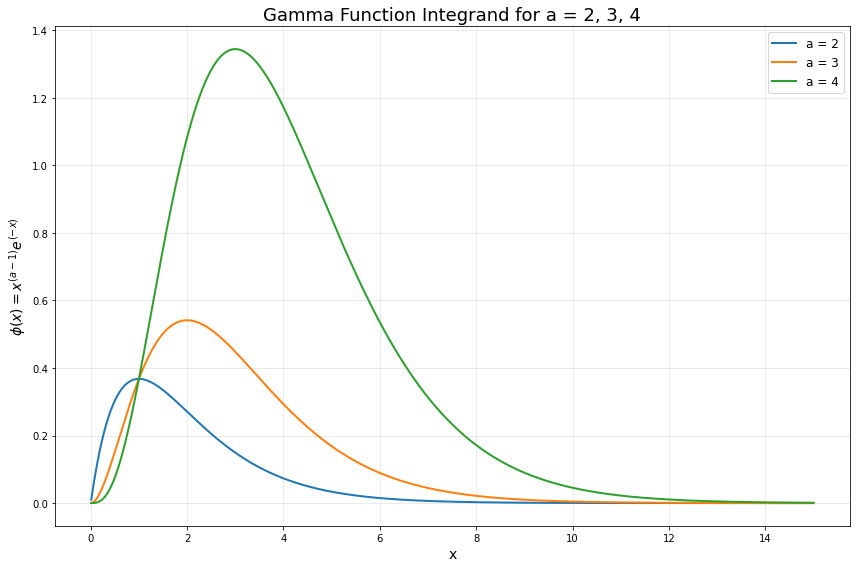

In [23]:
a_values = [2, 3, 4]
x = np.linspace(0.01, 15, 1000)

plt.figure(figsize=(12, 8))

for a in a_values:
    y = gamma_integrand(x, a)
    plt.plot(x, y, linewidth=2, label=f'a = {a}')

plt.xlabel('x', fontsize=14)
plt.ylabel('$\phi(x) = x^{(a-1)} e^{(-x)}$', fontsize=14)
plt.title('Gamma Function Integrand for a = 2, 3, 4', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

$\textbf{(b)}$ For what value of $x$ is the integrand $\phi(x)$ maximum?

To find the maximum of $\phi(x) = x^{a-1} e^{-x}$, take the derivative using the product rule:

$$\phi'(x) = \frac{d}{dx}[x^{a-1}] \cdot e^{-x} + x^{a-1} \cdot \frac{d}{dx}[e^{-x}]$$

$$\phi'(x) = (a-1)x^{a-2} e^{-x} + x^{a-1} \cdot (-e^{-x})$$

$$\phi'(x) = (a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x}$$

Set $\phi'(x) = 0$ and factor out $x^{a-2}e^{-x}$:

$$x^{a-2}e^{-x}[(a-1) - x] = 0$$

Since $x > 0$ and $e^{-x} > 0$, we need:

$$(a-1) - x = 0$$

$\boxed{x_{\text{max}} = a - 1}$

For our specific values:
- $a = 2$: $x_{\text{max}} = 1$
- $a = 3$: $x_{\text{max}} = 2$  
- $a = 4$: $x_{\text{max}} = 3$

$\textbf{(c)}$ Choose the value $c$ in our transformation such that the peak of the integrand occurs at $z = 1/2—$ what value is $c$?

This choice spreads the interesting regions of integrand over the domain $z \in [0, 1]$, making our
numerical integration more accurate.

We have the transformation:
$$z = \frac{x}{x + c}$$

From part (b), the peak of $\phi(x)$ occurs at $x = a - 1$.

We want this peak to map to $z = 1/2$:
$$\frac{a-1}{(a-1) + c} = \frac{1}{2}$$

Cross-multiply:
$$2(a-1) = (a-1) + c$$

$$2(a-1) - (a-1) = c$$

$$\boxed{c = a - 1}$$

Verification:
- $a = 2$: $c = 1$, peak at $x=1$ maps to $z = 1/(1+1) = 0.5$ 
- $a = 3$: $c = 2$, peak at $x=2$ maps to $z = 2/(2+2) = 0.5$ 
- $a = 4$: $c = 3$, peak at $x=3$ maps to $z = 3/(3+3) = 0.5$

$\textbf{(d)}$ Find $\Gamma (a)$ for a few different value of $a > 1$ using and numerical integration method you wish, integrating from $z = 0$ to $z = 1$. Keep the number of points in your quadrature to a reasonable amount ($N \lesssim 50$).

Don’t forget to include the factors you pick up when changing dx to dz.

Note that roundoff error may come into play in the integrand. Recognizing that you can write $x^{a−1} = e^{(a−1) \, \text{ln} \, x}$ can help minimize this.

Starting with: $\Gamma(a) = \int_0^\infty x^{a-1} e^{-x} dx$

Transform using $z = \frac{x}{x+c}$ with $c = a-1$:
- Solve for $x$: $x = \frac{cz}{1-z}$
- Compute Jacobian: $\frac{dx}{dz} = \frac{c}{(1-z)^2}$

The integral becomes:
$$\Gamma(a) = \int_0^1 \left(\frac{cz}{1-z}\right)^{a-1} e^{-\frac{cz}{1-z}} \cdot \frac{c}{(1-z)^2} \, dz$$

Using the exponential form $x^{a-1} = e^{(a-1)\ln x}$ to avoid round-off errors.


In [24]:
from scipy.integrate import fixed_quad

In [25]:
def transformed_integrand(z, a):
    
    c = a - 1
    x = c * z / (1 - z)
    jacobian = c / (1 - z)**2
    
    integrand = np.exp((a-1) * np.log(x) - x)
    
    return integrand * jacobian

In [29]:
a_values = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0]
n_points = 25

print(f"{'a':<6} {'Numerical':<12} {'Exact (γ)':<12} {'Rel Error':<12}")
print("-"*50)

for a in a_values:
    result, _ = fixed_quad(transformed_integrand, 0, 1, args=(a,), n=n_points)
    exact = gamma(a)
    rel_error = abs(result - exact) / exact
    
    print(f"{a:<6.1f} {result:<12.8f} {exact:<12.8f} {rel_error:<12.2e}")

a      Numerical    Exact (γ)    Rel Error   
--------------------------------------------------
1.5    0.88622515   0.88622693   2.00e-06    
2.0    0.99999983   1.00000000   1.73e-07    
2.5    1.32934023   1.32934039   1.17e-07    
3.0    2.00000010   2.00000000   4.88e-08    
3.5    3.32335088   3.32335097   2.71e-08    
4.0    6.00000007   6.00000000   1.21e-08    
5.0    23.99999967  24.00000000  1.38e-08    


The transformed integral with fixed quadrature converges rapidly. With $\sim25$ points, results match exact Gamma values with relative errors $\lesssim 10^{-7}$.
